<a href="https://colab.research.google.com/github/utsabdangol/machine_learing_python/blob/main/langgraph4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install langgraph
from typing import TypedDict, List,Literal
from langgraph.graph import StateGraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 7.9 MB/s eta 0:00:00


In [15]:
class AgentState(TypedDict):
  number1: int
  operation1: str
  number2: int
  finalnumber1: int
  number3: int
  operation2: str
  number4: int
  finalnumber2: int

In [25]:
def adder1(state:AgentState) -> AgentState:
  """ this node adds the 2 number"""
  state["finalnumber"] = state["number1"] + state["number2"]
  return state

def subtrator1(state:AgentState) -> AgentState:
  """ this node adds the 2 number"""
  state["finalnumber"] = state["number1"] - state["number2"]
  return state

def decide_node1(state:AgentState) -> AgentState:
  """this node will decide the operation"""
  if state["operation1"] == "+":
    return "addition_opration"
  elif state["operation1"] == "-":
    return "subtraction_operation"

def adder2(state:AgentState) -> AgentState:
  """ this node adds the 2 number"""
  state["finalnumber"] = state["number3"] + state["number4"]
  return state

def subtrator2(state:AgentState) -> AgentState:
  """ this node adds the 2 number"""
  state["finalnumber"] = state["number3"] - state["number4"]
  return state

def decide_node2(state:AgentState) -> AgentState:
  """this node will decide the operation"""
  if state["operation2"] == "+":
    return "addition_opration"
  elif state["operation2"] == "-":
    return "subtraction_operation"

In [26]:
from langgraph.graph import StateGraph, END, START

graph = StateGraph(AgentState)

graph.add_node("add_node",adder1)
graph.add_node("subtract_node",subtrator1)
graph.add_node("add_node2",adder2)
graph.add_node("subtract_node2",subtrator2)
graph.add_node("router", lambda state:state)
graph.add_node("router2", lambda state:state)
graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    decide_node1,
    {
        "addition_opration":"add_node",
        "subtraction_operation":"subtract_node"
    }
)
graph.add_edge("add_node","router2")
graph.add_edge("subtract_node","router2")
graph.add_conditional_edges(
    "router2",
    decide_node2,
    {
        "addition_opration":"add_node2",
        "subtraction_operation":"subtract_node2"
    }
)
graph.add_edge("add_node",END)
graph.add_edge("subtract_node",END)

app = graph.compile()

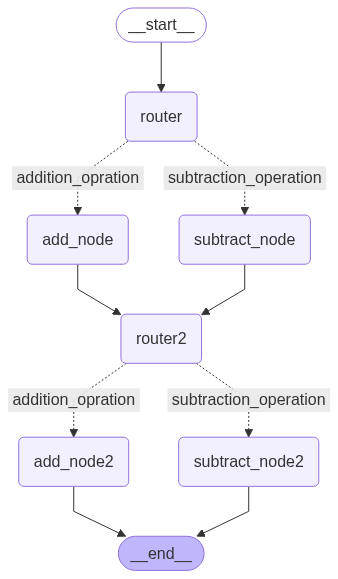

In [27]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [28]:
msg = app.invoke({"number1":1,"number2":5,"operation1":"+","number3":5,"number4":6,"operation2":"-"})
print(msg)

{'number1': 1, 'operation1': '+', 'number2': 5, 'number3': 5, 'operation2': '-', 'number4': 6}
